# 1. Import the data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

In [3]:
path=r'/Users/sofiakazeko/Jupiter/Dec-2024 Instacart Basket Analysis'

In [7]:
# import the df_cust_merge 
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cust_merge.pkl'))

In [8]:
df_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,First Name,Surname,Gender,STATE,Age,date_joined,number_of_dependants,Family_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [9]:
df_cust_merge.shape

(32404859, 33)

# 2. Addressing PII data

In [11]:
#dropping columns with sensitive info and _merge column
df_cust_merge_1=df_cust_merge.drop(['First Name', 'Surname', '_merge'], axis=1)

In [13]:
df_cust_merge_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,median_days,frequency_flag,Gender,STATE,Age,date_joined,number_of_dependants,Family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


In [14]:
df_cust_merge_1.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'number_of_dependants', 'Family_status',
       'income'],
      dtype='object')

# 3a  Create a regional segmentation of the data.

In [15]:
# Get count of each state value
state_counts = df_cust_merge_1['STATE'].value_counts()

In [16]:
state_counts

STATE
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [18]:
# Define regions based on U.S. Census Bureau
df_cust_merge_1.loc[df_cust_merge_1['STATE'].isin([
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
    'Vermont', 'New Jersey', 'New York', 'Pennsylvania'
]), 'Region'] = 'Northeast'

df_cust_merge_1.loc[df_cust_merge_1['STATE'].isin([
    'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa',
    'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'
]), 'Region'] = 'Midwest'

df_cust_merge_1.loc[df_cust_merge_1['STATE'].isin([
    'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
    'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky',
    'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'
]), 'Region'] = 'South'

df_cust_merge_1.loc[df_cust_merge_1['STATE'].isin([
    'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah',
    'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'
]), 'Region'] = 'West'

In [19]:
df_cust_merge_1['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [20]:
# Group by 'State' and check unique 'Region' counts
df_cust_merge_1.groupby('STATE')['Region'].nunique()



STATE
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Pennsy

# 3b Determine whether there’s a difference in spending habits between the different U.S. regions

In [200]:
spending_crosstab = pd.crosstab(df_cust_merge_1['Region'], df_cust_merge_1['spending_flag'], dropna = False)

In [25]:
print (spending_crosstab)

spending_flag  High spender  Low spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


In [176]:
spending_crosstab.to_clipboard()

In [27]:
# Group by 'Spending Flag' and 'Region' and count unique 'user_id' 
result = df_cust_merge_1.groupby(['spending_flag', 'Region'])['user_id'].nunique()


In [28]:
print(result)

spending_flag  Region   
High spender   Midwest       1263
               Northeast      883
               South         1817
               West          1394
Low spender    Midwest      47256
               Northeast    35505
               South        66920
               West         51171
Name: user_id, dtype: int64


In [178]:
# save changes 
df_cust_merge_1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_cust_merge_final.pkl'))

# 4.Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [30]:
#Create an exclusion flag for customers with fewer than 5 orders
df_cust_merge_1['exclusion_flag'] = df_cust_merge_1['max_order'] < 5

In [33]:
filtered_df = df_cust_merge_1[df_cust_merge_1['exclusion_flag'] == False]


In [34]:
filtered_df['user_id'].nunique()

162631

In [35]:
df_cust_merge_1['user_id'].nunique()

206209

In [36]:
unique_user_ids_by_exclusion=df_cust_merge_1.groupby('exclusion_flag')['user_id'].nunique()

In [37]:
print(unique_user_ids_by_exclusion)

exclusion_flag
False    162631
True      43578
Name: user_id, dtype: int64


In [38]:
#Drop the 'exclusion_flag' column in the filtered  df
filtered_df = filtered_df.drop(columns=['exclusion_flag'])

In [172]:
filtered_df.shape

(30964564, 36)

In [174]:
# Count the number of excluded rows (customers with fewer than 5 orders)
excluded_rows = df_cust_merge_1[df_cust_merge_1['exclusion_flag'] == True]


In [175]:
excluded_rows.shape

(1440295, 32)

In [179]:
# save changes 
filtered_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'filtered_df_final.pkl'))

# 5.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [41]:
# Specify columns for summary statistics
columns_to_describe = ['Age', 'income', 'number_of_dependants']

In [42]:
# Get summary statistics for specified columns
summary_stats = filtered_df[columns_to_describe].describe()

In [43]:
print(summary_stats)

                Age        income  number_of_dependants
count  3.096456e+07  3.096456e+07          3.096456e+07
mean   4.946803e+01  9.967587e+04          1.501819e+00
std    1.848528e+01  4.314187e+04          1.118896e+00
min    1.800000e+01  2.590300e+04          0.000000e+00
25%    3.300000e+01  6.729200e+04          1.000000e+00
50%    4.900000e+01  9.676500e+04          2.000000e+00
75%    6.500000e+01  1.281020e+05          3.000000e+00
max    8.100000e+01  5.939010e+05          3.000000e+00


# Assign profile based on conditions

In [100]:
# Single Adult: Age <= 30, No Dependents
filtered_df.loc[(filtered_df['Age'] <= 30) & (filtered_df['number_of_dependants'] == 0), 'profile'] = 'Single Young Adult'


In [99]:
# Young Parent: Age <= 30, with Dependents
filtered_df.loc[(filtered_df['Age'] <= 30) & (filtered_df['number_of_dependants'] > 0), 'profile'] = 'Young Parent'

In [98]:
# Mature Family: Age 30-60, with Dependents
filtered_df.loc[(filtered_df['Age'] > 30) & (filtered_df['Age'] <= 60) & (filtered_df['number_of_dependants'] > 0), 'profile'] = 'Mature Family'


In [103]:
# Senior with dependents: Age > 60 and has dependents
filtered_df.loc[(filtered_df['Age'] > 60) & (filtered_df['number_of_dependants'] > 0), 'profile'] = 'Senior with Dependents'

In [104]:
# Senior without dependents: Age > 60 and no dependents
filtered_df.loc[(filtered_df['Age'] > 60) & (filtered_df['number_of_dependants'] == 0), 'profile'] = 'Senior without Dependents'

In [102]:
# Mature Single Adult: Age > 30, No Dependents
filtered_df.loc[(filtered_df['Age'] > 30) &(filtered_df['Age'] <= 60)& (filtered_df['number_of_dependants'] == 0), 'profile'] = 'Mature Single Adult'

In [71]:
# Other
filtered_df.loc[filtered_df['profile'].isna(), 'profile'] = 'Other'

In [53]:
# Define income brackets
filtered_df['income_level'] = pd.cut(filtered_df['income'], bins=[0, 50000, 100000, 1000000], labels=['Low Income', 'Medium Income', 'High Income'])


In [55]:
# change type for income level
filtered_df['income_level'] = filtered_df['income_level'].astype(str)




In [182]:
# Group by income level and count unique 'user_id's
income = filtered_df.groupby('income_level')['user_id'].nunique()

<function matplotlib.pyplot.show(close=None, block=None)>

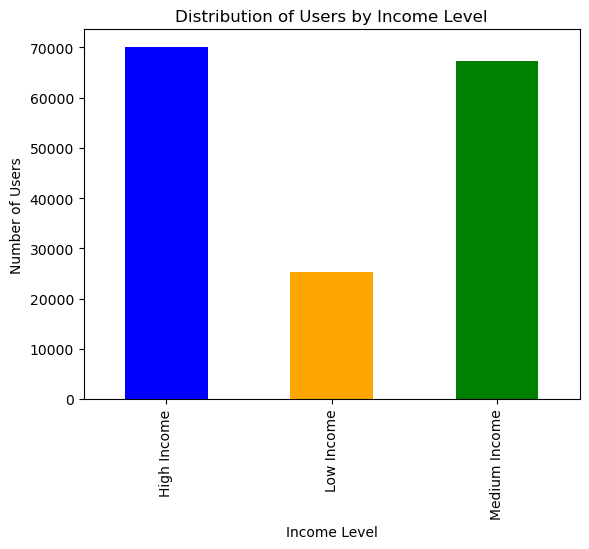

In [184]:
#making bar chart 
income_disctribution_bar= income.plot.bar(color=['blue', 'orange', 'green'])
plt.title('Distribution of Users by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Users')
plt.show

In [186]:
# Export the bar chart
income_disctribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

In [105]:
# Group by 'profile' and 'income_level' and count unique user IDs
result_1 = filtered_df.groupby(['profile', 'income_level'])['user_id'].nunique()

In [107]:
print (result_1)

profile                    income_level 
Mature Family              High Income      25572
                           Low Income        8808
                           Medium Income    22805
Mature Single Adult        High Income       8580
                           Low Income        2918
                           Medium Income     7653
Senior with Dependents     High Income      26290
                           Low Income        4894
                           Medium Income     8892
Senior without Dependents  High Income       8723
                           Low Income        1625
                           Medium Income     2865
Single Young Adult         High Income        232
                           Low Income        1805
                           Medium Income     6326
Young Parent               High Income        683
                           Low Income        5142
                           Medium Income    18818
Name: user_id, dtype: int64


# 6. Visualize

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [108]:
# Group by 'profile' and count unique 'user_id's
profile = filtered_df.groupby('profile')['user_id'].nunique()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mature Family'),
  Text(1, 0, 'Mature Single Adult'),
  Text(2, 0, 'Senior with Dependents'),
  Text(3, 0, 'Senior without Dependents'),
  Text(4, 0, 'Single Young Adult'),
  Text(5, 0, 'Young Parent')])

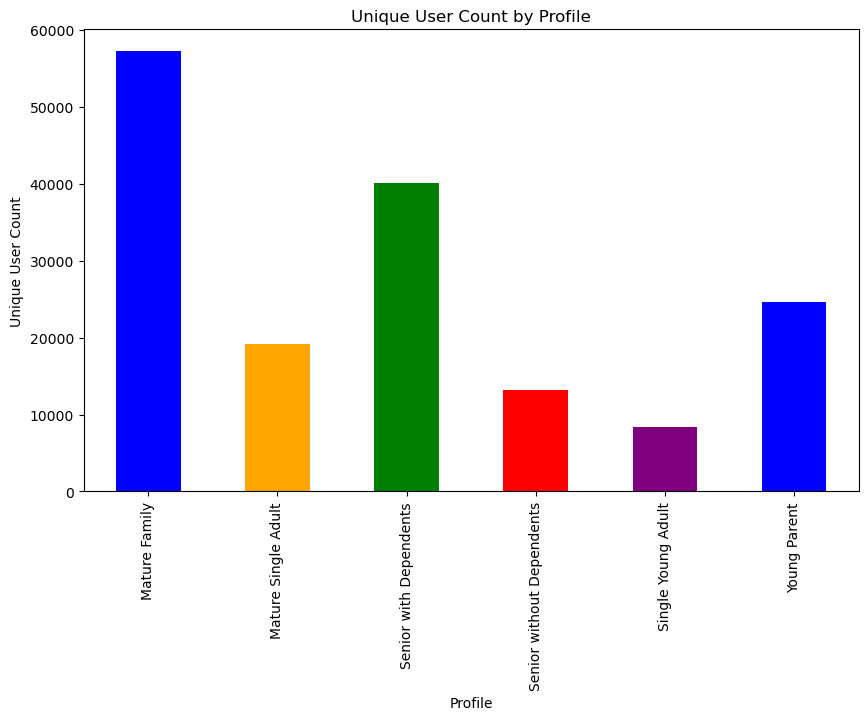

In [192]:
# Bar Chart
plt.figure(figsize=(10, 6))
profile_bar=profile.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple']) 
plt.title('Unique User Count by Profile')
plt.xlabel('Profile')
plt.ylabel('Unique User Count')
plt.xticks(rotation=90)

In [193]:
# Export the bar chart
profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_bar.png'))

Text(0, 0.5, '')

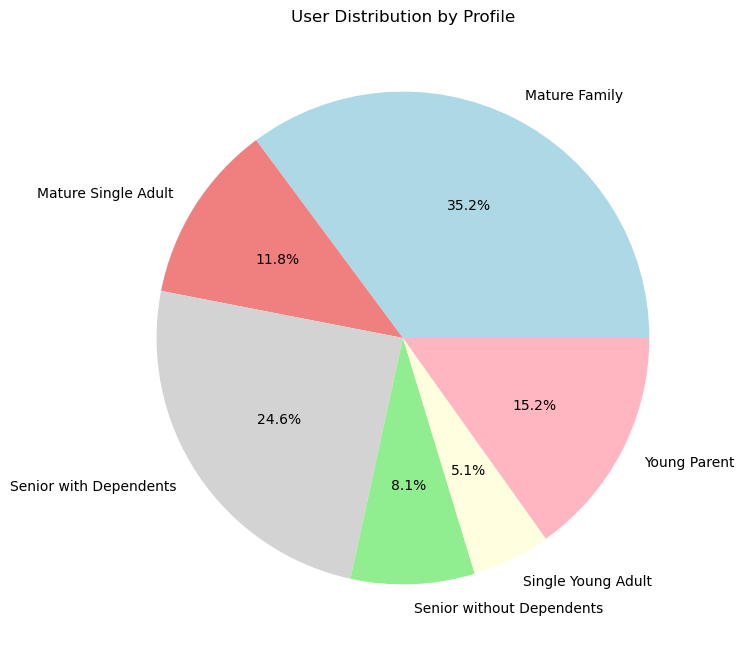

In [194]:
# Pie Chart
plt.figure(figsize=(8, 8))
profile_pie=profile.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral','lightgrey', 'lightgreen', 'lightyellow', 'lightpink'], legend=False)  # Inline colors for the pie chart
plt.title('User Distribution by Profile')
plt.ylabel('')

In [195]:
# Export chart
profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_pie.png'))

In [110]:
# Group by 'profile' and 'income_level' and count unique 'user_id's
profile_income = filtered_df.groupby(['profile', 'income_level'])['user_id'].nunique().unstack()

<Axes: xlabel='profile'>

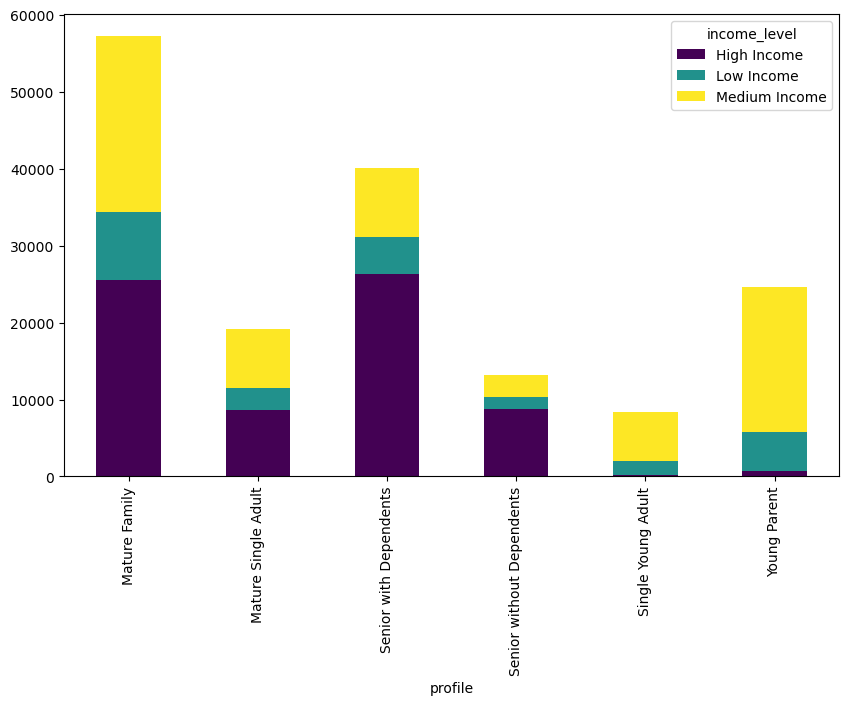

In [111]:
# Plot the data
profile_income.plot.bar(stacked=True, figsize=(10, 6), colormap='viridis')


# Loyalty vs Profile

In [199]:
# Crosstab loyalty with profile
loyalty_profile = pd.crosstab(filtered_df ['loyalty_flag'], filtered_df['profile'], dropna = False)
loyalty_profile

profile,Mature Family,Mature Single Adult,Senior with Dependents,Senior without Dependents,Single Young Adult,Young Parent
loyalty_flag,,,,,,
Loyal customer,3628066,1232373,2515539,849145,507326,1551644
New customer,1684151,558749,1190856,388345,254171,727423
Regular customer,5602292,1842086,3873111,1295611,811875,2451801


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

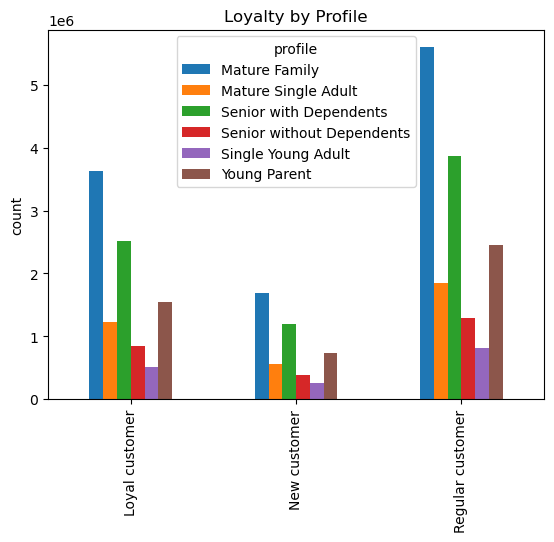

In [201]:
# bar chart
loyalty_profile_bar = loyalty_profile.plot.bar()
plt.title('Loyalty by Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=90)

In [202]:
# Export the chart
loyalty_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_profile_bar.png'))

In [275]:
# distribution by family status
fam_status = filtered_df['Family_status'].value_counts(dropna = False)
fam_status

Family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

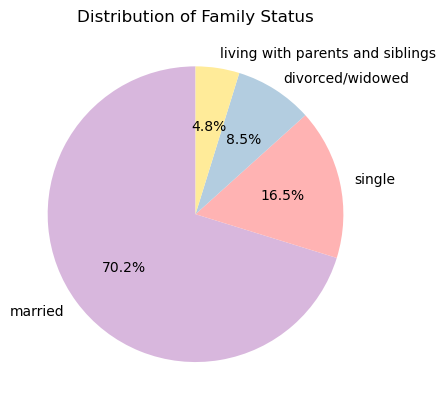

In [267]:
# Pie chart showing the distribution of family status
fam_status_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#D8B7DD', '#FFB3B3', '#B3CDE0', '#FFEB99'])
plt.ylabel('') 
plt.title('Distribution of Family Status')
plt.show()

In [268]:
# Export the chart
fam_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_pie.png'))

In [270]:
# Crosstab loyalty with family status
loyalty_fam = pd.crosstab(filtered_df['loyalty_flag'], filtered_df['Family_status'], dropna = False)
loyalty_fam

Family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

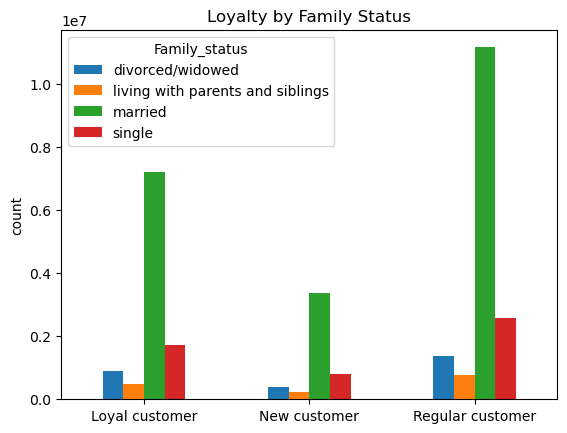

In [271]:
# bar chart
loyalty_fam_bar = loyalty_fam.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [272]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_family_bar.png'))

# Spending vs Profile

In [203]:
# Crosstab spending with profile
spending_profile = pd.crosstab(filtered_df ['spending_flag'], filtered_df ['profile'], dropna = False)
spending_profile

profile,Mature Family,Mature Single Adult,Senior with Dependents,Senior without Dependents,Single Young Adult,Young Parent
spending_flag,,,,,,
High spender,217027,71982,149735,49737,24323,90621
Low spender,10697482,3561226,7429771,2483364,1549049,4640247


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

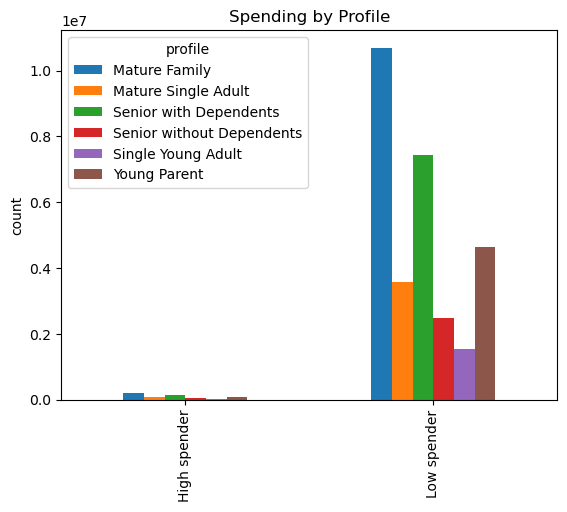

In [204]:
# bar chart
spending_profile_bar = spending_profile.plot.bar()
plt.title('Spending by Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=90)

In [205]:
# Export the chart
spending_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_profile_bar.png'))

# Spending and loyalty vs income level

In [221]:
# Crosstab loyalty with income
loyalty_income = pd.crosstab(df_final['loyalty_flag'], df_final['income_level'], dropna = False)

In [222]:
loyalty_income

income_level,High Income,Low Income,Medium Income
loyalty_flag,,,
Loyal customer,4758209,1032934,4492950
New customer,2143551,627180,2032964
Regular customer,7305268,1702440,6869068


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

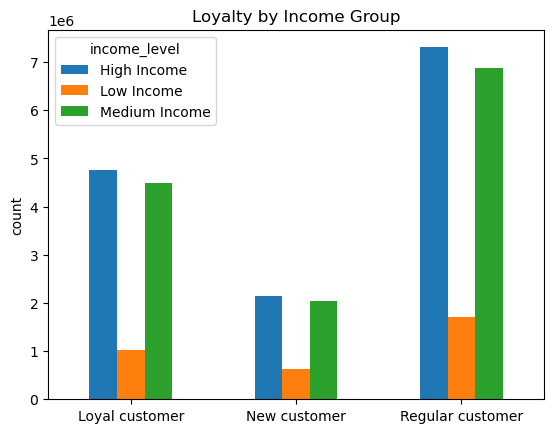

In [223]:
# bar chart
loyalty_income_bar = loyalty_income.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [224]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_bar.png'))

In [225]:
# Crosstab loyalty with spending
loyalty_spending = pd.crosstab(df_final['loyalty_flag'], df_final['spending_flag'], dropna = False)
loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

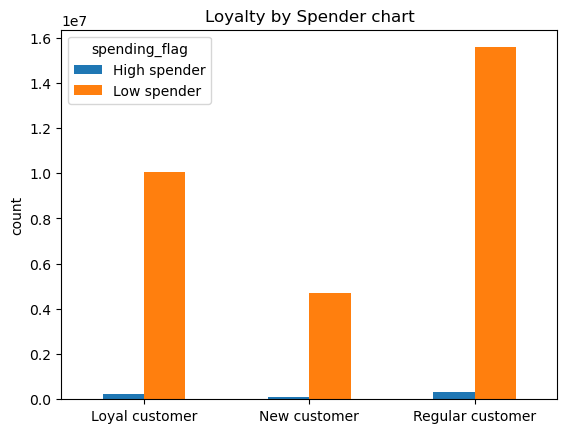

In [226]:
# bar chart
loyalty_spending_bar = loyalty_spending.plot.bar()
plt.title('Loyalty by Spender chart')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [227]:
# Export the chart
loyalty_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending_bar.png'))

# Departments stats

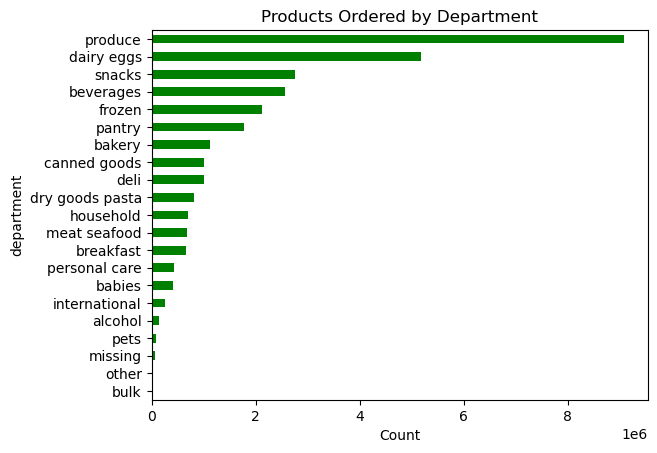

In [229]:
# bar chart frequency of orders vs department
deps_bar = df_final['department'].value_counts(ascending=True).plot(kind='barh', color='green', xlabel = 'Count', title='Products Ordered by Department')

In [230]:
# Export bar chart
deps_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'deps_bar.png'))

In [231]:
# crosstab profile vs department
profile_dep = pd.crosstab(df_final['profile'], df_final['department'], dropna = False)
profile_dep 

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
profile,,,,,,,,,,,,,,,,,,,,,
Mature Family,50225,145464,394317,905036,237248,11797,355937,1824231,351695,290866,...,248243,90632,238389,22781,11708,630606,150848,31977,3200094,977187
Mature Single Adult,18339,47839,132899,302937,78428,3765,118408,608731,119419,94510,...,79819,30058,77059,7605,4206,208292,49434,10918,1069557,323169
Senior with Dependents,34185,99836,274361,633122,163326,8372,248667,1263593,245870,200401,...,173938,61725,167245,15854,8361,436866,102503,22719,2224034,673537
Senior without Dependents,11443,33183,91656,211565,54213,2557,80818,424351,83097,67251,...,56041,20853,55190,4849,2726,145080,34843,7851,742363,226796
Single Young Adult,7045,22306,56840,130839,33791,1678,51794,261294,50866,42535,...,35498,13550,33629,3481,1782,90532,21928,4833,463521,140473
Young Parent,23390,61764,170755,388402,103844,5282,156450,794982,152887,126573,...,106318,39173,103269,10198,5628,271329,64750,14762,1379704,425244


In [232]:
# Sort each row by values and keep top 5 departments for each profile
top_departments = profile_dep.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)


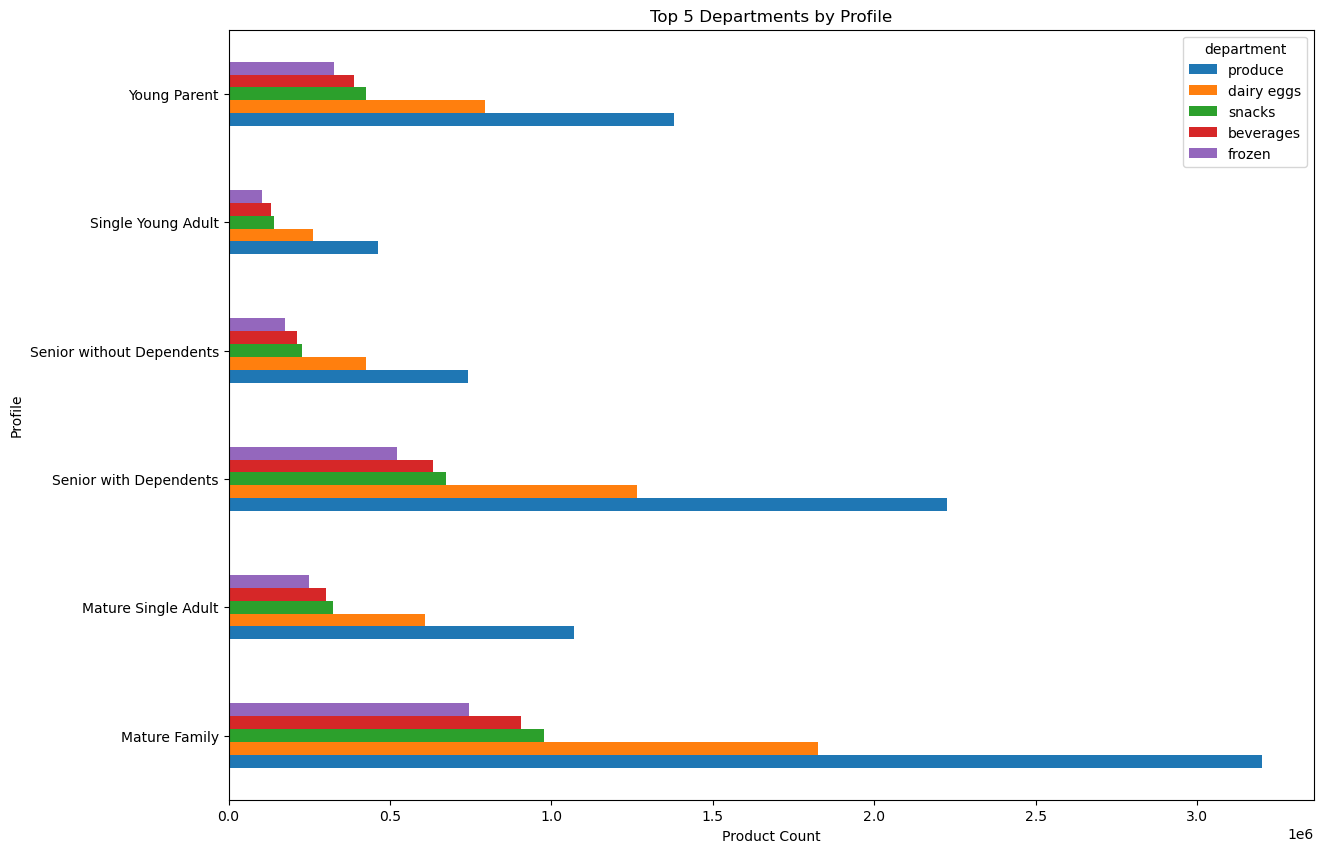

In [234]:
# Plot top 5 departments for each profile
top_departments_profile=top_departments.plot(kind='barh', stacked=False, figsize=(14, 10))
plt.title('Top 5 Departments by Profile')
plt.xlabel('Product Count')
plt.ylabel('Profile')
plt.show()

In [236]:
# Export bar chart
top_departments_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_departments_profile_barh.png'))

In [237]:
# crosstab income level vs department
income_dep = pd.crosstab(df_final['income_level'], df_final['department'], dropna = False)
income_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_level,,,,,,,,,,,,,,,,,,,,,
High Income,69142,196696,527703,1126437,297594,14218,485226,2406160,462089,392709,...,319958,119987,335535,29452,15749,839920,193412,45089,4236921,1104579
Low Income,18047,29240,106757,383121,91408,4676,78975,502363,106448,64481,...,87216,21636,34278,6547,3886,166061,47782,8612,826314,559529
Medium Income,57438,184456,486368,1062343,281848,14557,447873,2268659,435297,364946,...,292683,114368,304968,28769,14776,776724,183112,39359,4016038,1102298


Text(0, 0.5, 'income group')

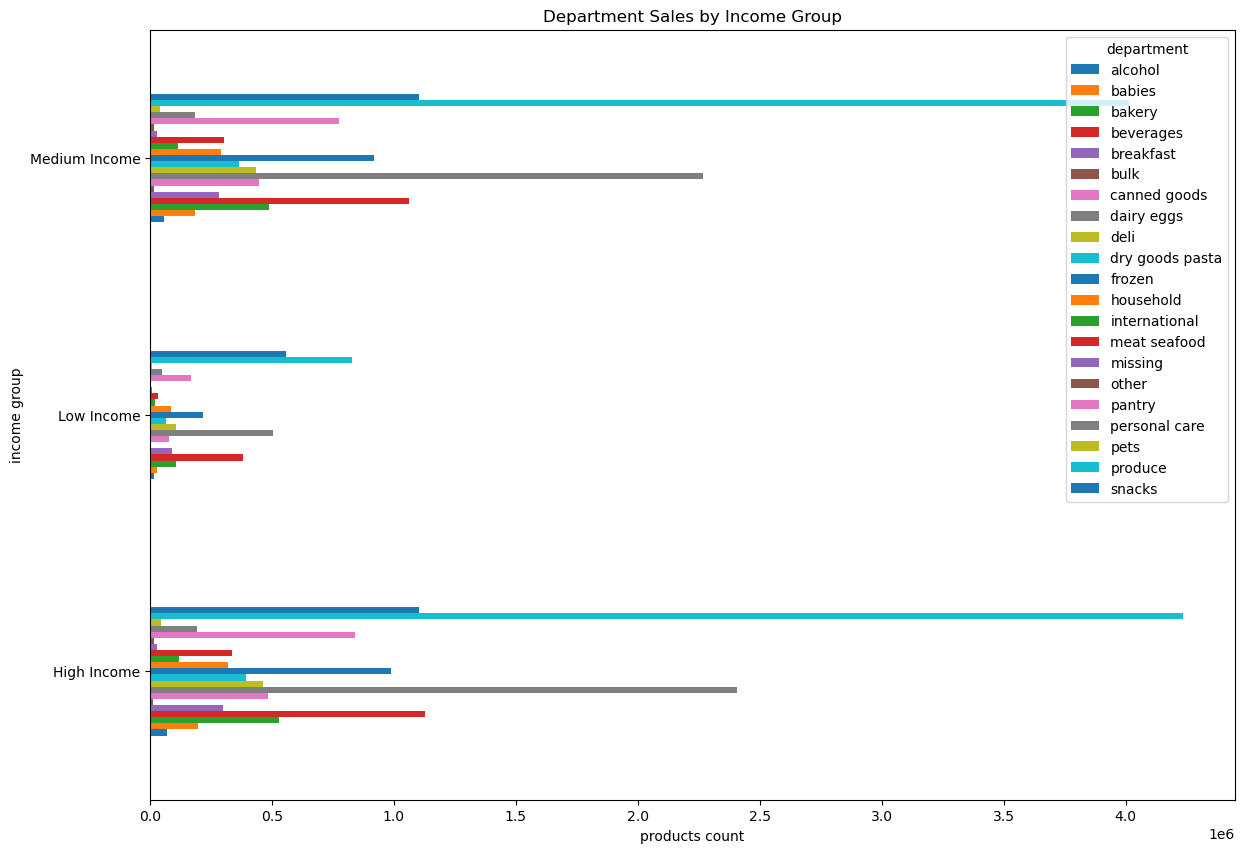

In [238]:
# bar chart
income_dep_bar = income_dep.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')

In [239]:
# Export bar chart
income_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dep_bar.png'))

# Updating 3b with filtered_df

In [241]:
# Crosstab Region to spending flag
region_spending= pd.crosstab(filtered_df['Region'], filtered_df['spending_flag'], dropna = False)

In [242]:
region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


In [243]:
# Group by 'Spending Flag' and 'Region' and count unique 'user_id' 
result_region = filtered_df.groupby(['spending_flag', 'Region'])['user_id'].nunique()

In [244]:
result_region

spending_flag  Region   
High spender   Midwest        883
               Northeast      613
               South         1259
               West           946
Low spender    Midwest      37493
               Northeast    27968
               South        52934
               West         40535
Name: user_id, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

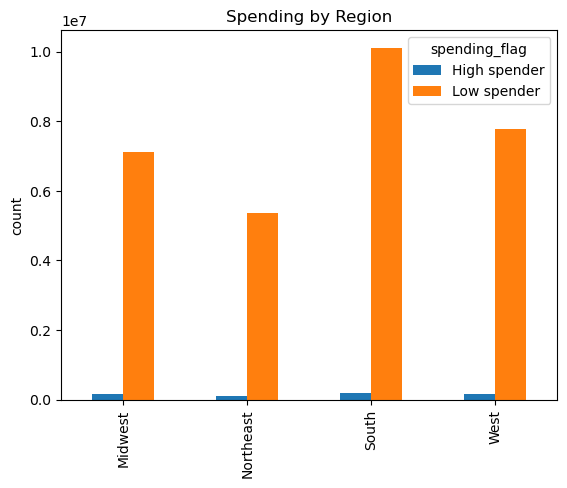

In [248]:
# bar chart
region_spending_bar = region_spending.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=90)

In [249]:
# Export the chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [253]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final.groupby(['user_id', 'Gender', 'STATE', 'Region', 'Family_status','number_of_dependants','Age', 'profile','order_number',  'orders_day_of_week', 'order_time', 'loyalty_flag', 'frequency_flag', 'income_level', 'spending_flag'])['prices'].sum().reset_index()

In [254]:
customer_profile.head()

,user_id,Gender,STATE,Region,Family_status,number_of_dependants,Age,profile,order_number,orders_day_of_week,order_time,loyalty_flag,frequency_flag,income_level,spending_flag,prices
0,1,Female,Alabama,South,married,3,31,Mature Family,1,2,8,New customer,Non-frequent customer,Low Income,Low spender,31.600000
1,1,Female,Alabama,South,married,3,31,Mature Family,2,3,7,New customer,Non-frequent customer,Low Income,Low spender,35.400002
2,1,Female,Alabama,South,married,3,31,Mature Family,3,3,12,New customer,Non-frequent customer,Low Income,Low spender,28.200001
3,1,Female,Alabama,South,married,3,31,Mature Family,4,4,7,New customer,Non-frequent customer,Low Income,Low spender,26.000000
4,1,Female,Alabama,South,married,3,31,Mature Family,5,4,15,New customer,Non-frequent customer,Low Income,Low spender,57.000000


In [273]:
#  Aggregated variables for expenditure
customer_aggregate = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [257]:
customer_aggregate

order_number                prices                        
                 max min  mean         max         min        mean
user_id                                                           
1                 10   1   5.5   63.099998   25.000000   37.570000
10                 5   1   3.0  429.600006   39.099998  247.419998
100                5   1   3.0   97.599998   23.400002   53.240002
1000               7   1   4.0  134.399994  112.900002  123.714287
10000             72   1  36.5  298.200012   11.800000  122.022217
...              ...  ..   ...         ...         ...         ...
99994             11   1   6.0  174.000000   86.199997  126.800003
99995              5   1   3.0  132.500000   42.599998   79.580002
99996             12   1   6.5  127.100006    2.800000   79.049995
99998              5   1   3.0   51.200001   20.799999   38.020000
99999             34   1  17.5  159.699997    6.700000   70.541176

[162631 rows x 6 columns]

In [258]:
# Aggregate variables for usage frequency
freq_aggregate = filtered_df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [259]:
freq_aggregate

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259260
10                 5   1   3.223776                   30.0  12.0  20.746376
100                5   1   3.555556                   30.0  18.0  26.320000
1000               7   1   3.980583                   30.0   5.0  11.647727
10000             72   1  35.973443                   17.0   0.0   4.949580
...              ...  ..        ...                    ...   ...        ...
99994             11   1   6.042683                   30.0   5.0  19.144737
99995              5   1   3.480000                   30.0   6.0  16.086956
99996             12   1   5.898438                   30.0  15.0  21.672413
99998              5   1   3.285714                   12.0   7.0   8.842105
99999             34   1  16.565350                   24.0   1.0   7.638365

[162631 rows x 6 columns]

# 8. Compare your customer profiles with regions and departments

In [216]:
# crosstab region vs department
region_dept = pd.crosstab(df_final['Region'], df_final['department'], dropna = False)
region_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


Text(0, 0.5, 'region')

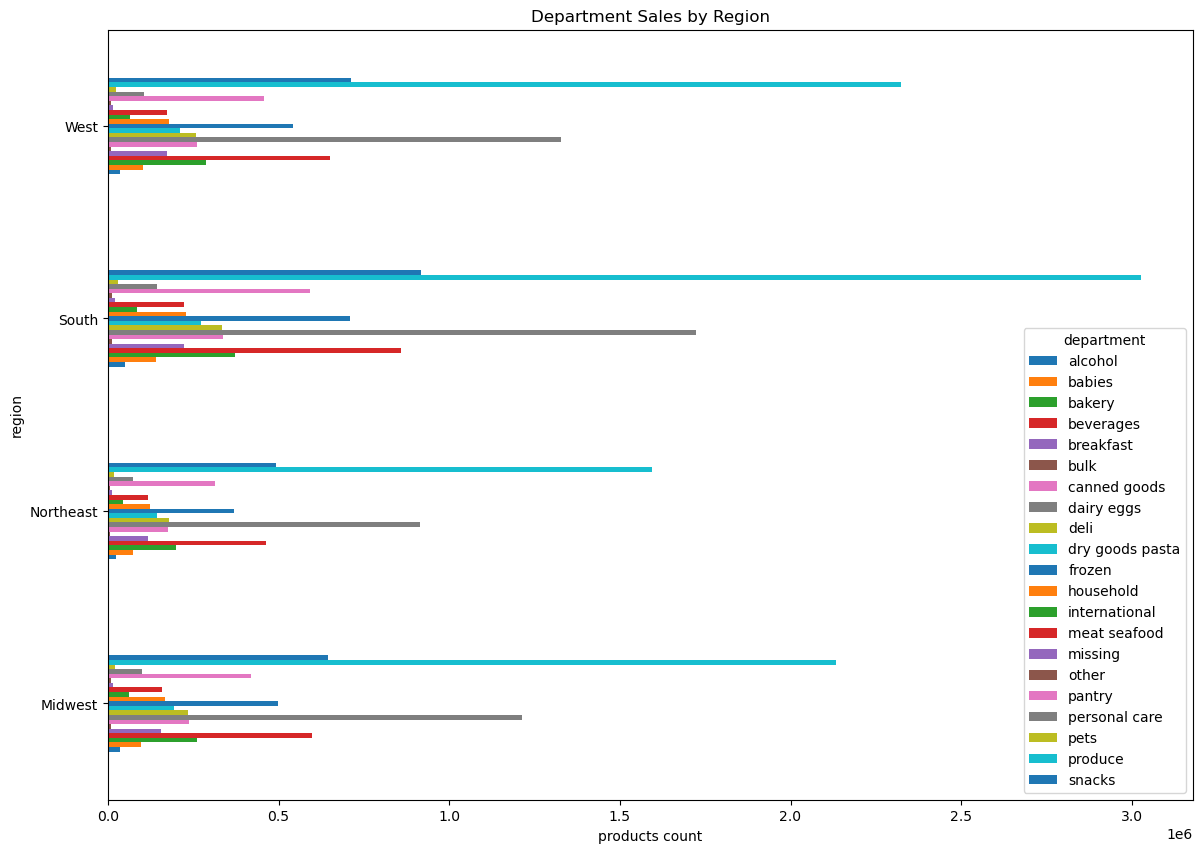

In [217]:
# bar chart
region_dept_bar = region_dept.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')


In [218]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar.png'))

In [274]:
# Import departments dataframe
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [165]:
df_deps

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [208]:
df_deps.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [211]:
 df_final= filtered_df.merge(df_deps, on='department_id', indicator='merged')

In [213]:
df_final['merged'].value_counts()

merged
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [214]:
# Exporting new dataframe with department merged 
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_final.pkl'))